Coefficient (slope b1): 2.481080506420612
Intercept (b0): 0.6664532323416843
R² Score: 0.8513751834366683
Mean Squared Error: 8.931947838521832


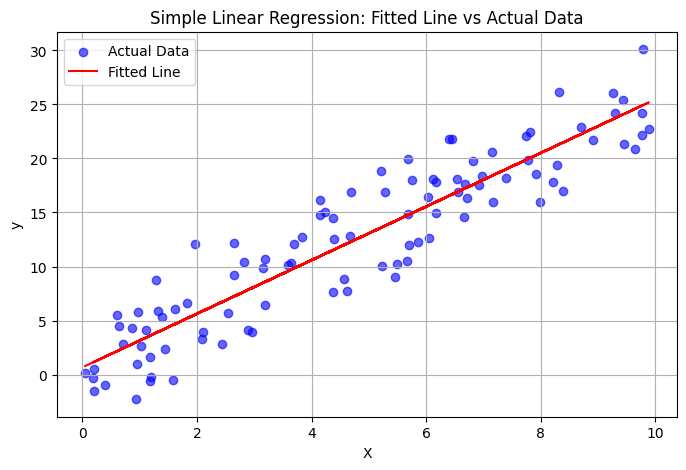

In [1]:
# Import necessary libraries
import numpy as np                # For numerical operations
import pandas as pd               # For structured data
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For better styled plots
from sklearn.linear_model import LinearRegression  # For building linear models
from sklearn.metrics import r2_score, mean_squared_error  # For evaluation metrics
import statsmodels.api as sm      # For detailed statistics (R², p-values, etc.)

# ---------------------------------------------------
# STEP 1: Create synthetic data
# ---------------------------------------------------

# Set a random seed to make the results reproducible
# Every time you run this code, you'll get the same random numbers
np.random.seed(0)

# Create 100 random values for X between 0 and 10
X = np.random.rand(100, 1) * 10  # shape: (100, 1)

# Create the target variable y as a linear function of X with noise
# y = 2.5 * X + random noise from normal distribution
y = 2.5 * X.flatten() + np.random.randn(100) * 3  # shape: (100,)

# ---------------------------------------------------
# STEP 2: Fit Linear Regression using scikit-learn
# ---------------------------------------------------

# Create a LinearRegression model object
model = LinearRegression()

# Fit the model to the data
# Internally, this solves for coefficients b0 and b1 in: y = b0 + b1 * x
model.fit(X, y)

# Get the learned slope (coefficient) and intercept
print("Coefficient (slope b1):", model.coef_[0])
print("Intercept (b0):", model.intercept_)

# ---------------------------------------------------
# STEP 3: Make predictions and evaluate
# ---------------------------------------------------

# Predict the y values using the fitted model
y_pred = model.predict(X)

# R² score: Proportion of variance in y explained by X
# R² = 1 means perfect fit, R² = 0 means model explains nothing
print("R² Score:", r2_score(y, y_pred))

# Mean Squared Error: Average squared difference between actual and predicted
print("Mean Squared Error:", mean_squared_error(y, y_pred))

# ---------------------------------------------------
# STEP 4: Visualize the actual points and fitted line
# ---------------------------------------------------

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Actual Data', color='blue', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression: Fitted Line vs Actual Data")
plt.legend()
plt.grid(True)
plt.show()


First 5 rows of the dataset:
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Column names in the dataset:
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Linear Regression Model:
Intercept (b0): 7.033
Coefficient for TV (b1): 0.048

Model Evaluation:
R² Score: 0.612
Mean Squared Error: 10.513


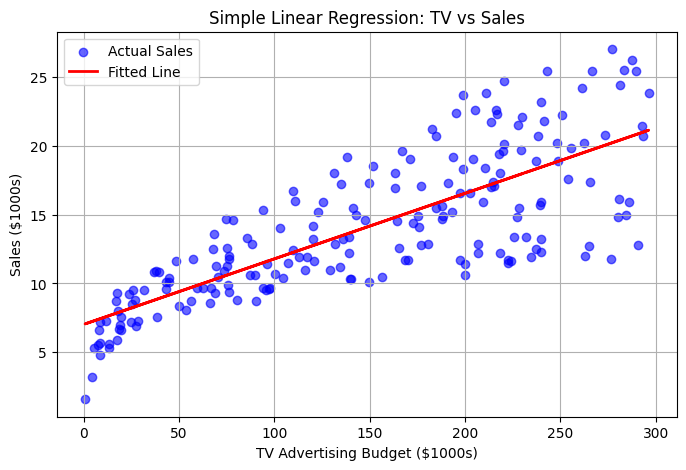


Full Statistical Summary:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.47e-42
Time:                        20:57:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326    

c:\Users\KARAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


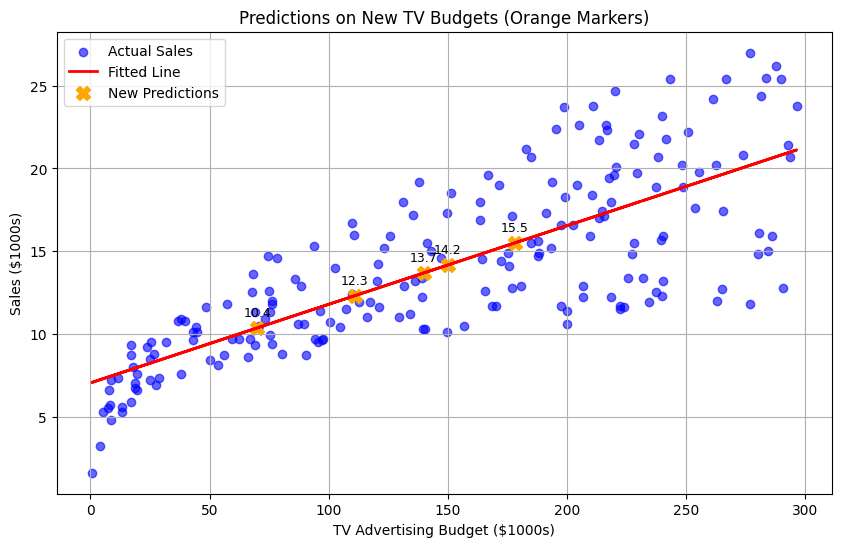

In [ ]:
# -------------------------------------------
# STEP 0: Import all necessary libraries
# -------------------------------------------
import pandas as pd               # For data manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For visualization
import seaborn as sns             # For prettier plots
from sklearn.linear_model import LinearRegression  # For Linear Regression model
from sklearn.metrics import r2_score, mean_squared_error  # For evaluation metrics
import statsmodels.api as sm      # For full regression statistics

# -------------------------------------------
# STEP 1: Load the dataset
# -------------------------------------------

# Dataset source: https://www.statlearning.com/resources-first-edition
# This version of the file includes an index column called 'Unnamed: 0', so we ignore it using index_col=0
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'

# Load the CSV and ignore the first column
df = pd.read_csv(url, index_col=0)

# Show the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())

# Check column names
print("\nColumn names in the dataset:")
print(df.columns)

# -------------------------------------------
# STEP 2: Select the feature and target
# -------------------------------------------

# We want to predict 'Sales' using only 'TV' advertising budget
X = df[['TV']]    # Predictor (must be 2D for sklearn)
y = df['sales']   # Target variable

# -------------------------------------------
# STEP 3: Fit the Linear Regression model
# -------------------------------------------

# Initialize the model
model = LinearRegression()

# Fit the model to the data (learn b0 and b1)
model.fit(X, y)

# Print model parameters
print("\nLinear Regression Model:")
print(f"Intercept (b0): {model.intercept_:.3f}")
print(f"Coefficient for TV (b1): {model.coef_[0]:.3f}")

# -------------------------------------------
# STEP 4: Predict and evaluate
# -------------------------------------------

# Use the model to make predictions on X
y_pred = model.predict(X)

# R² Score (explained variance)
r2 = r2_score(y, y_pred)

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

print(f"\nModel Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# -------------------------------------------
# STEP 5: Visualize actual data vs predictions
# -------------------------------------------

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Sales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.xlabel("TV Advertising Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Simple Linear Regression: TV vs Sales")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------
# BONUS: Detailed statistics using statsmodels
# -------------------------------------------

# Add constant term for intercept manually
# Explanation:
#   - statsmodels does NOT add the intercept (b0) by default
#   - So we must add a constant column (column of 1s) to X
#   - This allows the model to learn both intercept and slope
X_sm = sm.add_constant(X)  # Resulting X_sm will have two columns: [1, TV]

# Example of what X_sm looks like now:
#     const     TV
# 1     1.0   230.1
# 2     1.0    44.5
# ...   ...    ...

# Fit the model using Ordinary Least Squares (OLS)
# This is the core of linear regression: it minimizes the squared errors
#   y = b0 + b1 * TV  is fitted by minimizing sum of (y - ŷ)²
ols_model = sm.OLS(y, X_sm).fit()

# Print detailed regression summary
# This gives:
#   - Coefficients and intercept
#   - Standard errors
#   - t-statistics and p-values
#   - R² and Adjusted R²
#   - Confidence intervals
print("\nFull Statistical Summary:")
print(ols_model.summary())




c:\Users\KARAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



📊 Predictions for New TV Budgets:
TV = $ 70K --> Predicted Sales = 10.36K units
TV = $111K --> Predicted Sales = 12.31K units
TV = $140K --> Predicted Sales = 13.69K units
TV = $178K --> Predicted Sales = 15.49K units
TV = $150K --> Predicted Sales = 14.16K units


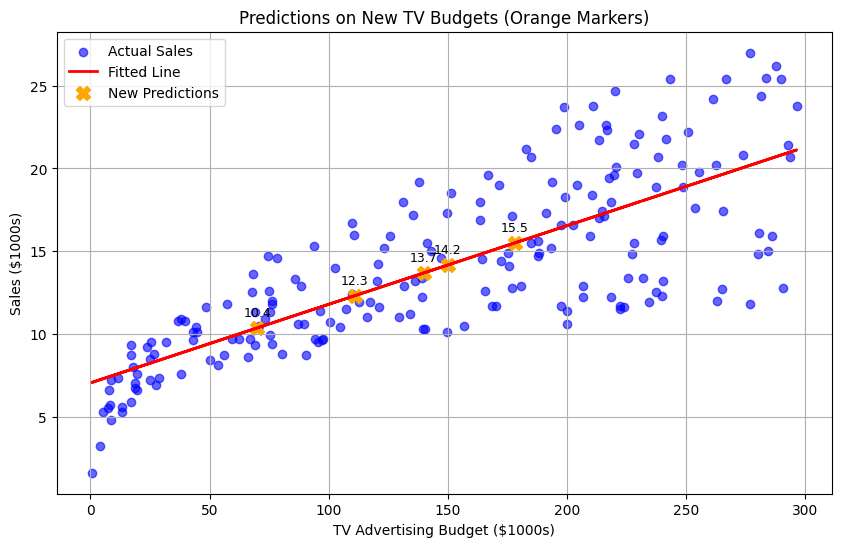

In [9]:


# -------------------------------------------
# STEP 6: Predict for new data points and plot them
# -------------------------------------------

# Let's say we want to predict sales for these new TV budgets (in $1000s):
new_tv_values = np.array([70, 111, 140, 178, 150]).reshape(-1, 1)

# Use the trained model to predict sales for these new values
new_sales_pred = model.predict(new_tv_values)

# Print the new predictions
print("\n📊 Predictions for New TV Budgets:")
for tv, sales in zip(new_tv_values.flatten(), new_sales_pred):
    print(f"TV = ${tv:>3}K --> Predicted Sales = {sales:.2f}K units")

# Plot original data and fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Sales')         # actual data
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')       # regression line
plt.scatter(new_tv_values, new_sales_pred, color='orange', s=100, marker='X', label='New Predictions')  # new predictions

# Annotate new points
for tv, sales in zip(new_tv_values.flatten(), new_sales_pred):
    plt.annotate(f"{sales:.1f}", (tv, sales), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=9)

# Labels and title
plt.xlabel("TV Advertising Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Predictions on New TV Budgets (Orange Markers)")
plt.legend()
plt.grid(True)
plt.show()


c:\Users\KARAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



📊 Predictions for New TV Budgets:
TV Budget ($1000s) --> Predicted Sales ($1000s)
 50                  -->     9.41
100                  -->     11.79
150                  -->     14.16
200                  -->     16.54
250                  -->     18.92


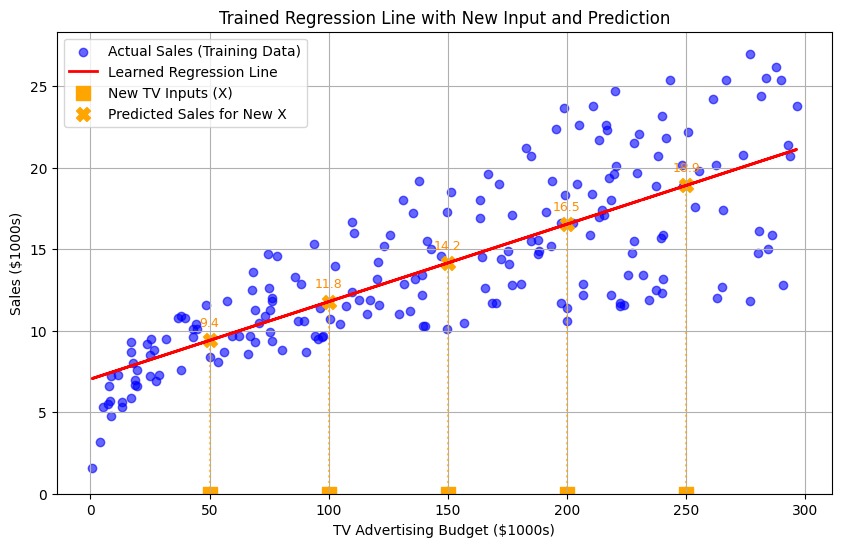

In [10]:
# -------------------------------------------
# STEP 6: Predict for new data points and plot them
# -------------------------------------------

# New TV values to predict Sales for
new_tv_values = np.array([50, 100, 150, 200, 250]).reshape(-1, 1)

# Predicted sales using trained model
new_sales_pred = model.predict(new_tv_values)

# Print new predictions
print("\n📊 Predictions for New TV Budgets:")
print("TV Budget ($1000s) --> Predicted Sales ($1000s)")
for tv, sales in zip(new_tv_values.flatten(), new_sales_pred):
    print(f"{tv:>3}                  -->     {sales:.2f}")

# Plotting
plt.figure(figsize=(10, 6))

# 1. Actual data points
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Sales (Training Data)')

# 2. Fitted regression line (model prediction on training X)
plt.plot(X, y_pred, color='red', linewidth=2, label='Learned Regression Line')

# 3. New input TV values (shown as orange squares)
plt.scatter(new_tv_values, [0]*len(new_tv_values), color='orange', s=100, marker='s', label='New TV Inputs (X)')

# 4. Corresponding predicted sales (orange Xs) — outputs on the line
plt.scatter(new_tv_values, new_sales_pred, color='orange', s=100, marker='X', label='Predicted Sales for New X')

# 5. Draw vertical dotted lines from each new input up to its prediction
for x_val, y_val in zip(new_tv_values.flatten(), new_sales_pred):
    plt.plot([x_val, x_val], [0, y_val], color='orange', linestyle='dotted', alpha=0.7)

# Annotate predictions
for tv, sales in zip(new_tv_values.flatten(), new_sales_pred):
    plt.annotate(f"{sales:.1f}", (tv, sales), textcoords="offset points", xytext=(0, 10),
                 ha='center', fontsize=9, color='darkorange')

# Plot styling
plt.xlabel("TV Advertising Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Trained Regression Line with New Input and Prediction")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.show()


First 5 rows of the dataset:
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Column names in the dataset:
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Linear Regression Model:
Intercept (b0): 7.033
Coefficient for TV (b1): 0.048

Model Evaluation:
R² Score: 0.612
Mean Squared Error: 10.513


c:\Users\KARAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


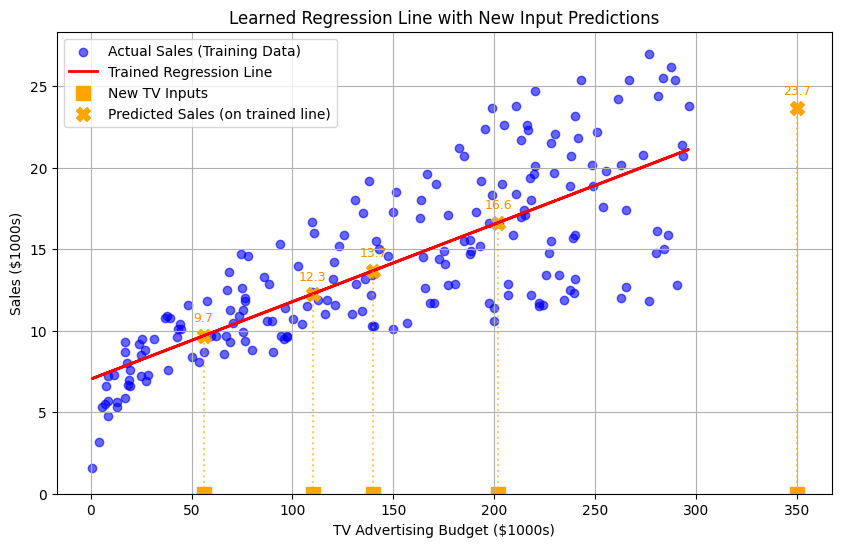


Full Statistical Summary:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.47e-42
Time:                        21:19:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326    

In [12]:
# -------------------------------------------
# STEP 0: Import all necessary libraries
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# -------------------------------------------
# STEP 1: Load the dataset
# -------------------------------------------
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url, index_col=0)

print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn names in the dataset:")
print(df.columns)

# -------------------------------------------
# STEP 2: Select the feature and target
# -------------------------------------------
X = df[['TV']]
y = df['sales']  # Make sure the column name is lowercase 'sales' if needed

# -------------------------------------------
# STEP 3: Fit the Linear Regression model
# -------------------------------------------
model = LinearRegression()
model.fit(X, y)

print("\nLinear Regression Model:")
print(f"Intercept (b0): {model.intercept_:.3f}")
print(f"Coefficient for TV (b1): {model.coef_[0]:.3f}")

# -------------------------------------------
# STEP 4: Predict and evaluate
# -------------------------------------------
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nModel Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# -------------------------------------------
# STEP 5: Visualize everything in one plot
# -------------------------------------------

# Define new TV input values
new_tv_values = np.array([56, 140, 110, 202, 350]).reshape(-1, 1)
new_sales_pred = model.predict(new_tv_values)

# Plot everything
plt.figure(figsize=(10, 6))

# 1. Actual training data
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Sales (Training Data)')

# 2. Trained regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Trained Regression Line')

# 3. New input TV values (as orange squares)
plt.scatter(new_tv_values, [0]*len(new_tv_values), color='orange', s=100, marker='s', label='New TV Inputs')

# 4. Predicted values (as orange Xs on the trained line)
plt.scatter(new_tv_values, new_sales_pred, color='orange', s=100, marker='X', label='Predicted Sales (on trained line)')

# 5. Vertical dotted lines from new inputs to their predictions
for x_val, y_val in zip(new_tv_values.flatten(), new_sales_pred):
    plt.plot([x_val, x_val], [0, y_val], color='orange', linestyle='dotted', alpha=0.6)
    plt.annotate(f"{y_val:.1f}", (x_val, y_val), textcoords="offset points", xytext=(0, 10),
                 ha='center', fontsize=9, color='darkorange')

# Final plot formatting
plt.xlabel("TV Advertising Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Learned Regression Line with New Input Predictions")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

# -------------------------------------------
# BONUS: Detailed statistics using statsmodels
# -------------------------------------------
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()

print("\nFull Statistical Summary:")
print(ols_model.summary())


🎯 What is Multiple Linear Regression?
Multiple Linear Regression models the relationship between one dependent variable and two or more independent variables.

Formula:

𝑦 (is equal to)
=
𝑏
0
+
𝑏
1
⋅
𝑋
1
+
𝑏
2
⋅
𝑋
2
+
⋯
+
𝑏
𝑛
⋅
𝑋
𝑛
y
^
​
 =b 
0
​
 +b 
1
​
 ⋅X 
1
​
 +b 
2
​
 ⋅X 
2
​
 +⋯+b 
n
​
 ⋅X 
n
​
 
Where:

𝑦
^


​
  is the predicted value (e.g., Sales)

𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X 
1
​
 ,X 
2
​
 ,...,X 
n
​
  are the input features (e.g., TV, Radio, Newspaper)

𝑏
0

​
  is the intercept

𝑏
1
,
𝑏
2
,
.
.
.
,
𝑏
𝑛
b 
1
​
 ,b 
2
​
 ,...,b 
n
​
  are the coefficients for each feature

The model finds the best coefficients that minimize the squared difference between actual and predicted values.

Dataset sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


C:\Users\KARAN\AppData\Local\Temp\ipykernel_17804\3014250258.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\KARAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


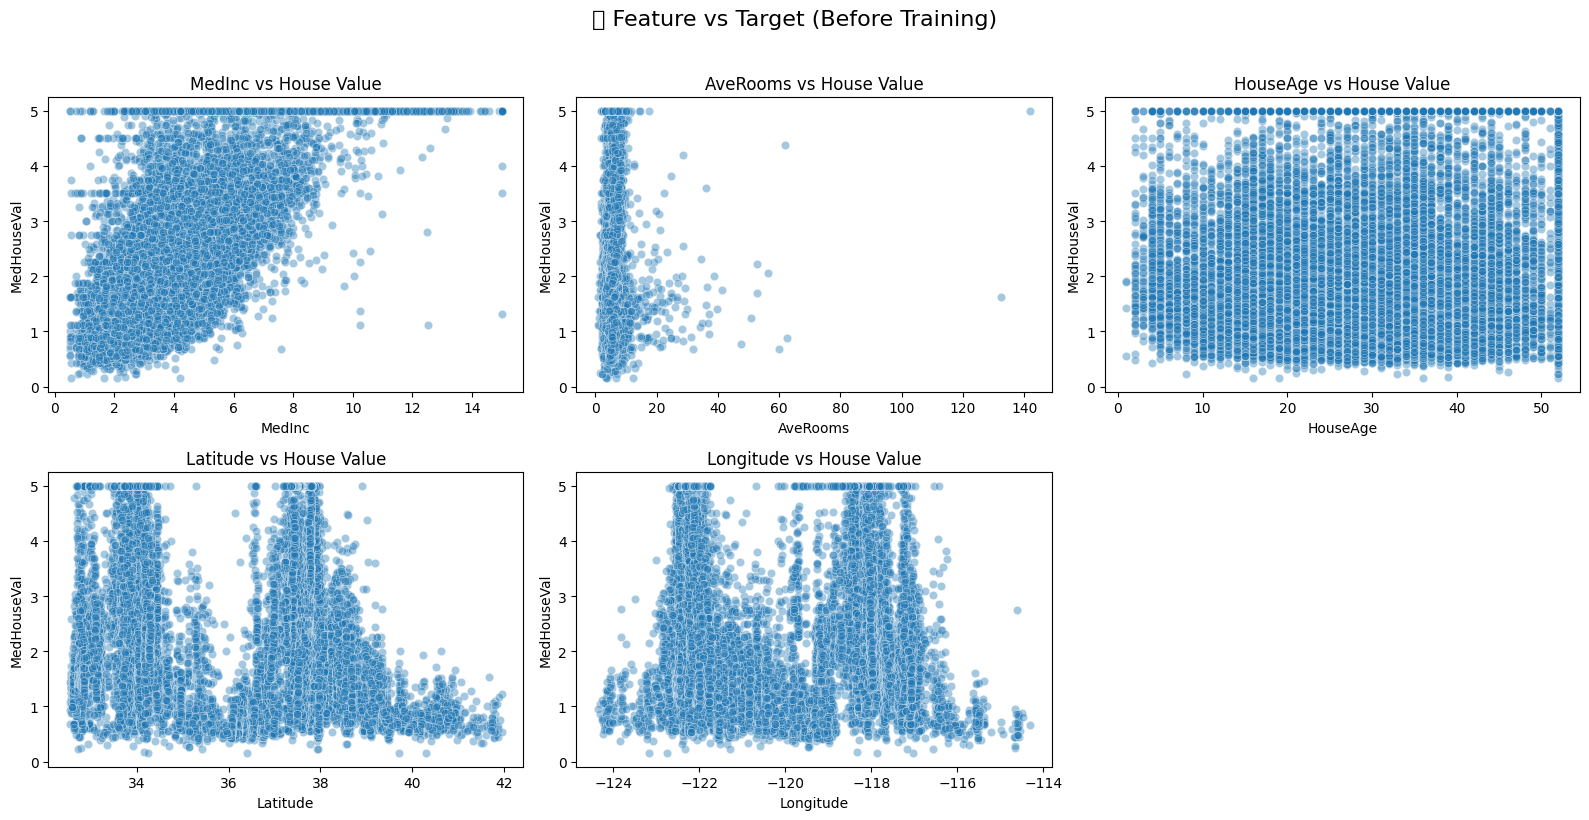


📘 Trained Model Parameters:
Intercept (b0): -39.103
Coefficient for MedInc (bᵢ): 0.371
Coefficient for AveRooms (bᵢ): 0.020
Coefficient for HouseAge (bᵢ): 0.010
Coefficient for Latitude (bᵢ): -0.459
Coefficient for Longitude (bᵢ): -0.466

📊 Evaluation on Test Set:
Mean Squared Error (MSE): 0.549
Root MSE (RMSE): 0.741
R² Score: 0.581


c:\Users\KARAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


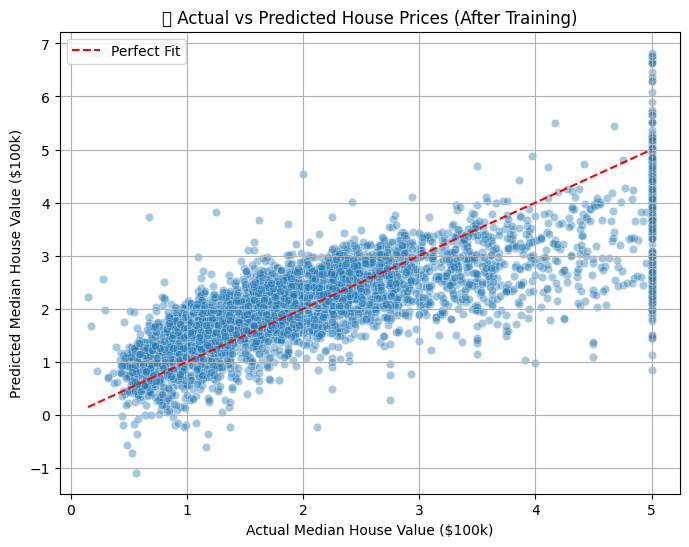

In [1]:
# --------------------------------------
# STEP 0: Import Libraries
# --------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------------------
# STEP 1: Load the California Housing Dataset
# --------------------------------------
# This dataset contains features like:
# - MedInc (Median Income)
# - HouseAge
# - AveRooms
# - Latitude & Longitude
# - Target: MedHouseVal (median house value in $100k)

data = fetch_california_housing(as_frame=True)
df = data.frame

print("Dataset sample:")
print(df.head())

# --------------------------------------
# STEP 2: Select Features and Target
# --------------------------------------
# Choosing a subset of features for simplicity
features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude']
X = df[features]              # Independent variables (predictors)
y = df['MedHouseVal']         # Dependent variable (target)

# --------------------------------------
# STEP 3: Visualize Data BEFORE Training
# --------------------------------------
# Scatter plots of each feature against the target
# Helps us understand whether relationships look linear or not

plt.figure(figsize=(16, 8))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=col, y='MedHouseVal', alpha=0.4)
    plt.title(f'{col} vs House Value')
plt.suptitle("📊 Feature vs Target (Before Training)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# --------------------------------------
# STEP 4: Split Data into Training & Testing Sets
# --------------------------------------
# Training data = used to learn the model parameters (b0, b1, ..., bn)
# Testing data = used to evaluate the model's generalization

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------
# STEP 5: Initialize and Train the Linear Regression Model
# --------------------------------------

# Create the model object
model = LinearRegression()

# Fit the model to training data
# Internally, this uses the Normal Equation:
#    β = (XᵗX)⁻¹Xᵗy
# Where:
# - X is the feature matrix (with intercept if added)
# - y is the target vector
# The goal is to minimize the sum of squared errors between y and predicted y

model.fit(X_train, y_train)

# --------------------------------------
# STEP 6: View Learned Parameters (What the Model Has Learned)
# --------------------------------------

print("\n📘 Trained Model Parameters:")
print(f"Intercept (b0): {model.intercept_:.3f}")
for name, coef in zip(features, model.coef_):
    print(f"Coefficient for {name} (bᵢ): {coef:.3f}")

# Interpretation:
# Each coefficient represents how much the house value is expected to change
# with a 1-unit increase in that feature, keeping others constant

# --------------------------------------
# STEP 7: Predict on Test Data (Using the Learned Model)
# --------------------------------------

# Use the fixed learned equation:
#     ŷ = b0 + b1 * MedInc + b2 * AveRooms + ... + b5 * Longitude
# This doesn't change or re-learn — just applies what was trained

y_pred = model.predict(X_test)

# --------------------------------------
# STEP 8: Evaluate Model Performance
# --------------------------------------

# Mean Squared Error (average squared difference between actual and predicted)
mse = mean_squared_error(y_test, y_pred)

# R² Score: Proportion of variance in y explained by the model (closer to 1 = better)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root MSE (RMSE): {np.sqrt(mse):.3f}")
print(f"R² Score: {r2:.3f}")

# --------------------------------------
# STEP 9: Visualize Actual vs Predicted (After Training)
# --------------------------------------

# Plotting how well our predicted values match the actual values
# Points closer to the red line (y=x) mean better predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("📈 Actual vs Predicted House Prices (After Training)")
plt.legend()
plt.grid(True)
plt.show()


| Phase              | What Happens                                                                            |
| ------------------ | --------------------------------------------------------------------------------------- |
| `.fit(X, y)`       | Solves the **Normal Equation**: finds the line/hyperplane that minimizes squared errors |
| `.predict(X)`      | Uses the fixed equation to compute predicted outputs                                    |
| `model.coef_`      | Stores the learned **slopes** for each feature                                          |
| `model.intercept_` | Stores the learned **intercept** (value when all Xs = 0)                                |


In [2]:
# --------------------------------------
# STEP 1: Imports and Dataset
# --------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Select features
features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']
X = df[features]
y = df['MedHouseVal']

# --------------------------------------
# STEP 2: Fit the Model (using statsmodels for full stats)
# --------------------------------------

# Add constant manually for intercept
X_with_const = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X_with_const).fit()

# Show full summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6066.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:06:05   Log-Likelihood:                -22910.
No. Observations:               20640   AIC:                         4.583e+04
Df Residuals:                   20634   BIC:                         4.588e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.1617      0.661    -59.283      0.0

| Output Item             | Meaning                                      |    |                                                        |
| ----------------------- | -------------------------------------------- | -- | ------------------------------------------------------ |
| `R-squared`             | % of target variance explained by your model |    |                                                        |
| `Adj. R-squared`        | Same as above, adjusted for feature count    |    |                                                        |
| `F-statistic`           | Tests if at least one predictor is useful    |    |                                                        |
| `Prob (F-statistic)`    | p-value for the whole model (significance)   |    |                                                        |
| `coef`, `std err`, \`P> | t                                            | \` | Slope, uncertainty, and significance for each variable |
| `Omnibus`, `JB`, etc.   | Normality tests on residuals                 |    |                                                        |


| If you see...                       | Then...                                 |
| ----------------------------------- | --------------------------------------- |
| High R² + High Adj. R² (e.g. > 0.7) | Good fit                                |
| R² high but Adj. R² low             | Overfitting — too many useless features |
| Very low p-values (< 0.05)          | Model/statistics are significant        |
| High MSE/RMSE                       | Predictions have large errors           |


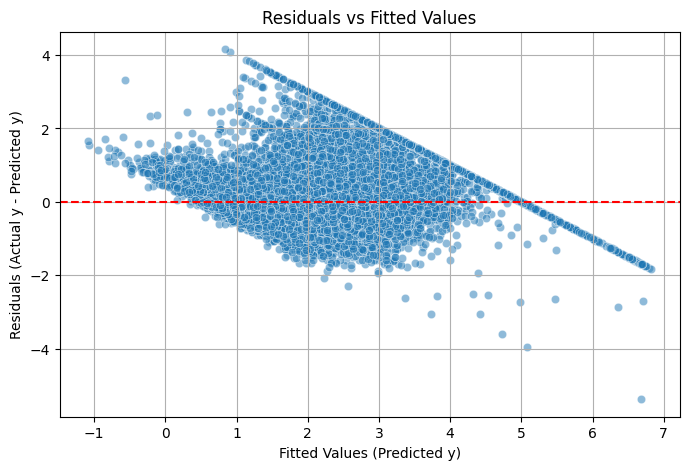

In [4]:
# --------------------------------------------
# Predict values and calculate residuals
# --------------------------------------------

# Predict the target values using the trained model
# These are the "fitted values" i.e., ŷ = b0 + b1*X1 + b2*X2 + ...
y_pred = model.predict(X_with_const)

# Residuals = actual values - predicted values
# Residuals show how far off the model's predictions are for each observation
residuals = y - y_pred

# --------------------------------------------
# Plot: Residuals vs Fitted Values
# --------------------------------------------

plt.figure(figsize=(8, 5))

# Create scatter plot: predicted y-values (ŷ) on X-axis, residuals on Y-axis
# This shows whether residuals are randomly spread or exhibit patterns
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)

# Add a horizontal red line at y = 0
# This line represents where the residual = 0 (i.e., prediction = actual)
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted y)")
plt.ylabel("Residuals (Actual y - Predicted y)")
plt.grid(True)
plt.show()


🔍 What This Plot Tells You:
📌 Fitted Values (x-axis):
These are the predictions made by the model:

𝑦
^
𝑖
=
𝑏
0
+
𝑏
1
𝑥
1
+
𝑏
2
𝑥
2
+
.
.
.
+
𝑏
𝑛
𝑥
𝑛
y
^
​
  
i
​
 =b 
0
​
 +b 
1
​
 x 
1
​
 +b 
2
​
 x 
2
​
 +...+b 
n
​
 x 
n
​
 
They are how the model "thinks" y should behave.

📌 Residuals (y-axis):
Residual
𝑖
=
𝑦
𝑖
−
𝑦
^
𝑖
Residual 
i
​
 =y 
i
​
 − 
y
^
​
  
i
​
 
They measure how far off each prediction is from the actual target.

📌 Red Line (y=0):
This line shows perfect prediction

Any point above the red line → model underestimated

Any point below the red line → model overestimated

| Pattern Seen                | What It Means                       | What to Do                     |
| --------------------------- | ----------------------------------- | ------------------------------ |
| Random scatter (no pattern) | ✅ Model is likely good              | No action needed               |
| Curve/arch shape            | ❌ Non-linear pattern not captured   | Add non-linear features        |
| Funnel (cone) shape         | ❌ Heteroscedasticity                | Use transformation (e.g., log) |
| Outliers or clusters        | ❌ Possible outliers/leverage points | Investigate & possibly remove  |


 Here's a complete, self-contained example that demonstrates:

✅ What interaction terms are
✅ How to detect if they’re needed using:

Visual analysis

Statistical significance

Model comparison (with vs. without interaction)

🎯 What I Meant:
👉 For the same TV budget, if the Radio budget is higher, then the Sales are also higher.

Example:
Let’s say TV = 100:

If Radio = 5, then maybe Sales = 10

But if Radio = 40, then maybe Sales = 18

🔁 That means TV’s effect is stronger when Radio spend is higher.

🧠 In Simple Terms:
TV alone improves Sales ✅

But Radio helps TV do better — they work better together 💡

This “together effect” is called an interaction term

💬 So, high radio budget is not on the higher side of TV axis, but:
It shifts the Sales upwards at any TV level.

And that’s why dots with high Radio budget (bright yellow-green) tend to appear higher up (greater Sales) for the same TV budget.

Dataset Preview:
       TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


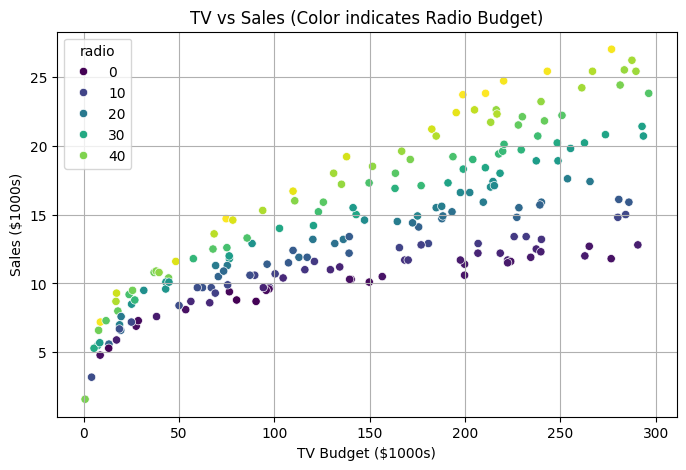


--- Model WITHOUT Interaction ---
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           4.83e-98
Time:                        23:39:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.

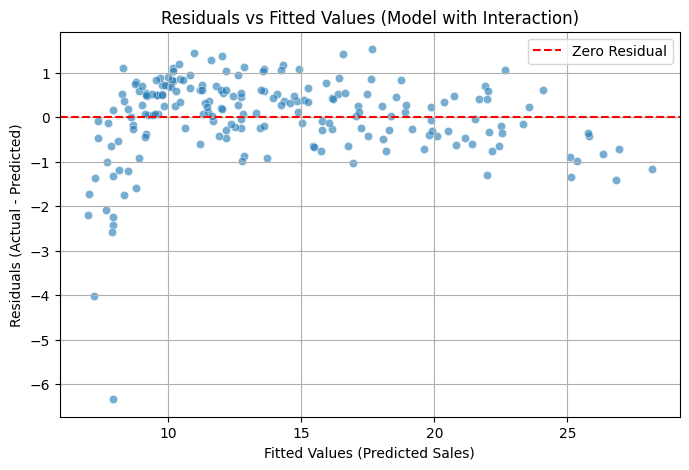

In [8]:
# -----------------------------------------------
# STEP 0: Import necessary libraries
# -----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

# -----------------------------------------------
# STEP 1: Load real-world dataset (Advertising)
# -----------------------------------------------
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, index_col=0)

# Display the first few rows of the dataset
print("Dataset Preview:\n", df.head())

# -----------------------------------------------
# STEP 2: Understand the problem
# -----------------------------------------------
# Objective: Predict 'Sales' using 'TV' and 'Radio' advertising budgets
# Hypothesis: TV and Radio might have an interaction effect — when used together, they may boost sales more than individually

# -----------------------------------------------
# STEP 3: Visualize potential interaction
# -----------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TV', y='sales', hue='radio', palette='viridis')
plt.title("TV vs Sales (Color indicates Radio Budget)")
plt.xlabel("TV Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.grid(True)
plt.show()

# 🔍 Observation: The relationship between TV and Sales appears to shift depending on Radio spend — this hints at an interaction.

# -----------------------------------------------
# STEP 4: Build Two Regression Models
# - Model 1: Without Interaction
# - Model 2: With Interaction Term (TV * Radio)
# -----------------------------------------------

# --- Model 1: TV + Radio only ---
X1 = df[['TV', 'radio']]
X1 = sm.add_constant(X1)  # Adds intercept term
y = df['sales']
model1 = sm.OLS(y, X1).fit()

# --- Model 2: TV + Radio + Interaction ---
df['TV_Radio'] = df['TV'] * df['radio']  # Interaction term
X2 = df[['TV', 'radio', 'TV_Radio']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

# -----------------------------------------------
# STEP 5: Compare Models Statistically
# -----------------------------------------------
print("\n--- Model WITHOUT Interaction ---")
print(model1.summary())

print("\n--- Model WITH Interaction ---")
print(model2.summary())

# Compare R² to see improvement in model fit
print(f"\nR² without interaction: {model1.rsquared:.4f}")
print(f"R² with interaction   : {model2.rsquared:.4f}")

# -----------------------------------------------
# STEP 6: Visualize Fitted vs Actual for Model 2
# -----------------------------------------------

# Predict using model with interaction
y_pred = model2.predict(X2)

# Residuals: difference between actual and predicted
residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Residuals vs Fitted Values (Model with Interaction)")
plt.xlabel("Fitted Values (Predicted Sales)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------
# 📘 KEY CONCEPTS EXPLAINED
# -----------------------------------------------

# Residual = Actual y - Predicted y
# Good models should have residuals randomly scattered around 0

# Interaction Term (TV * Radio):
# This captures the "combined effect" — i.e., maybe TV and Radio are more powerful when used together

# Interpreting p-values:
# If the p-value of the interaction term is < 0.05, it's statistically significant — it improves the model

# R² tells how much variance is explained:
# If R² improves significantly with interaction, we retain it



🔁 What Is Non-linear Transformation of Predictor?
Sometimes the relationship between X and y is not linear, so fitting a straight line won’t work well.

👉 We apply transformations to X like:

log(x)

underroot x

1/x 

x sqaure
 
to model non-linear effects in a linear regression framework.

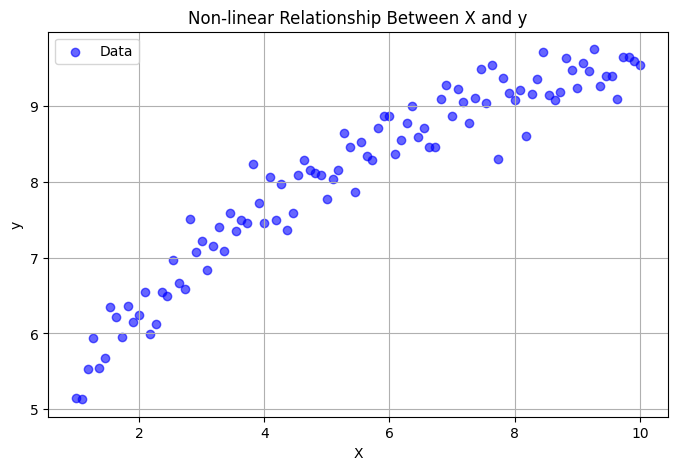

In [9]:
# ---------------------------------------------
# Step 1: Import necessary libraries
# ---------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------
# Step 2: Simulate non-linear data
# ---------------------------------------------
# Set seed for reproducibility
np.random.seed(42)

# Create a non-linear X (independent variable)
X = np.linspace(1, 10, 100).reshape(-1, 1)

# Create y as a non-linear function of X (logarithmic in this case)
y = 5 + 2 * np.log(X).flatten() + np.random.normal(0, 0.3, size=X.shape[0])

# Visualize the data
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data')
plt.title("Non-linear Relationship Between X and y")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


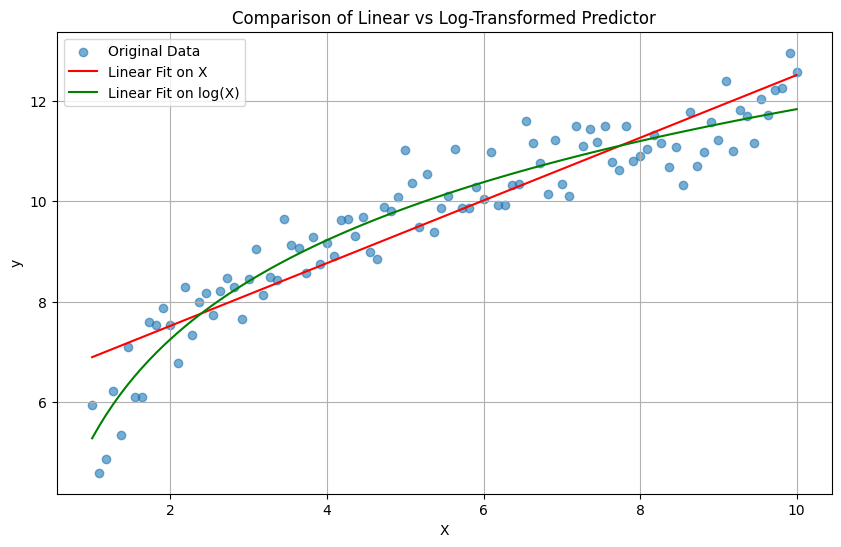

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate nonlinear data (y = log(x))
X = np.linspace(1, 10, 100)         # Make sure X starts from 1 to avoid log(0)
y = 5 + 3 * np.log(X) + np.random.normal(0, 0.5, size=100)

# -------- Linear Regression on Original Data --------
X_linear = X.reshape(-1, 1)
model_linear = LinearRegression()
model_linear.fit(X_linear, y)
y_pred_linear = model_linear.predict(X_linear)

# -------- Linear Regression on Log-Transformed X --------
X_log = np.log(X).reshape(-1, 1)  # Log transform and reshape
model_log = LinearRegression()
model_log.fit(X_log, y)
y_pred_log = model_log.predict(X_log)

# -------- Plot Both Fits --------
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data', alpha=0.6)
plt.plot(X, y_pred_linear, color='red', label='Linear Fit on X')
plt.plot(X, y_pred_log, color='green', label='Linear Fit on log(X)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Linear vs Log-Transformed Predictor")
plt.legend()
plt.grid(True)
plt.show()



🔍 Why Do We Apply log(x) Transformation to a Feature?
✅ 1. To Handle Non-Linear Relationships
If the relationship between your feature X and target y is non-linear, then a standard linear regression (which tries to fit a straight line) will fail to capture the pattern.

Sometimes, the data may look like this:

ini
Copy
Edit
y = a + b * log(x)
But linear regression assumes:

ini
Copy
Edit
y = a + b * x
So to fit it properly, we transform the feature:

arduino
Copy
Edit
Let z = log(x) → Now we model: y = a + b * z
✅ 2. To Reduce Skewness in the Data
Features with highly skewed distributions (especially right-skewed) can affect model performance.

Applying log(x) often makes the distribution more normal and improves model interpretability and accuracy.

✅ 3. To Stabilize Variance (Homoscedasticity)
Linear regression assumes constant variance (homoscedasticity) of residuals.

But if residuals fan out (widen) as x increases, applying log(x) often flattens that spread and satisfies regression assumptions better.

✅ What Happens After Taking Log of a Feature?
Let's say your original model doesn't fit well:

python
Copy
Edit
y = a + b * x
After transformation:

python
Copy
Edit
X_log = log(x)
Now the model becomes:

python
Copy
Edit
y = a + b * log(x)
You’re still using Linear Regression, but now on a transformed version of the feature.

The regression model will learn a different slope and intercept that match the new transformed data.

📊 Visual Example:
x	log(x)	y (target)
1	0	5.2
2	0.69	7.1
3	1.09	8.3
5	1.61	9.4
10	2.30	11.3

You can see:

x and y don’t grow linearly.

But log(x) and y do — which allows linear regression to fit a line successfully.

💡 Summary:
Reason for log(x)	What it helps with
Non-linear relationship	Makes it linear in log-space
Right-skewed feature	Reduces skewness
Heteroscedastic residuals	Stabilizes variance
Model interpretability	Helps interpret percentage changes

📘 Tip:
If you plot residuals and see a curved pattern, that’s a strong clue to try a transformation (like log(x), sqrt(x), or polynomial terms).

Let me know if you want to explore other transformations like x², 1/x, or interaction terms next!

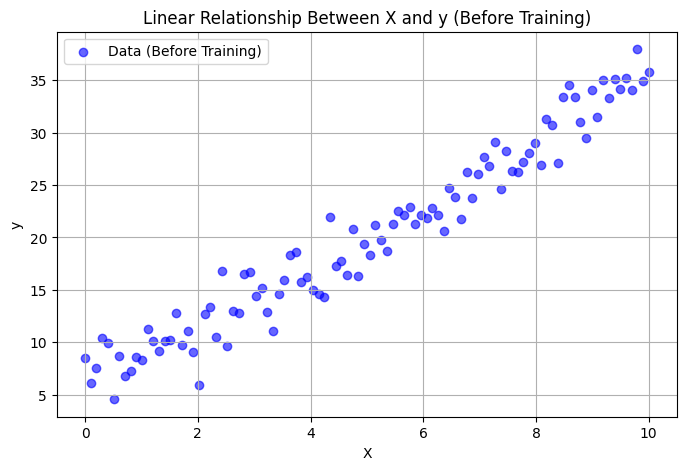

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# Simulate Linear Data Before Training
# -----------------------------------------------

np.random.seed(0)

# Independent variable (feature)
X = np.linspace(0, 10, 100)

# True underlying linear relationship: y = 3 * X + 5 + noise
y = 3 * X + 5 + np.random.randn(100) * 2  # small noise

# -----------------------------------------------
# Plot the raw data before training
# -----------------------------------------------

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data (Before Training)')
plt.title("Linear Relationship Between X and y (Before Training)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


[text](../../walmart-smart-shopper-1/a9b74c64-bd71-434e-9c7a-9eba74b4ddb1)

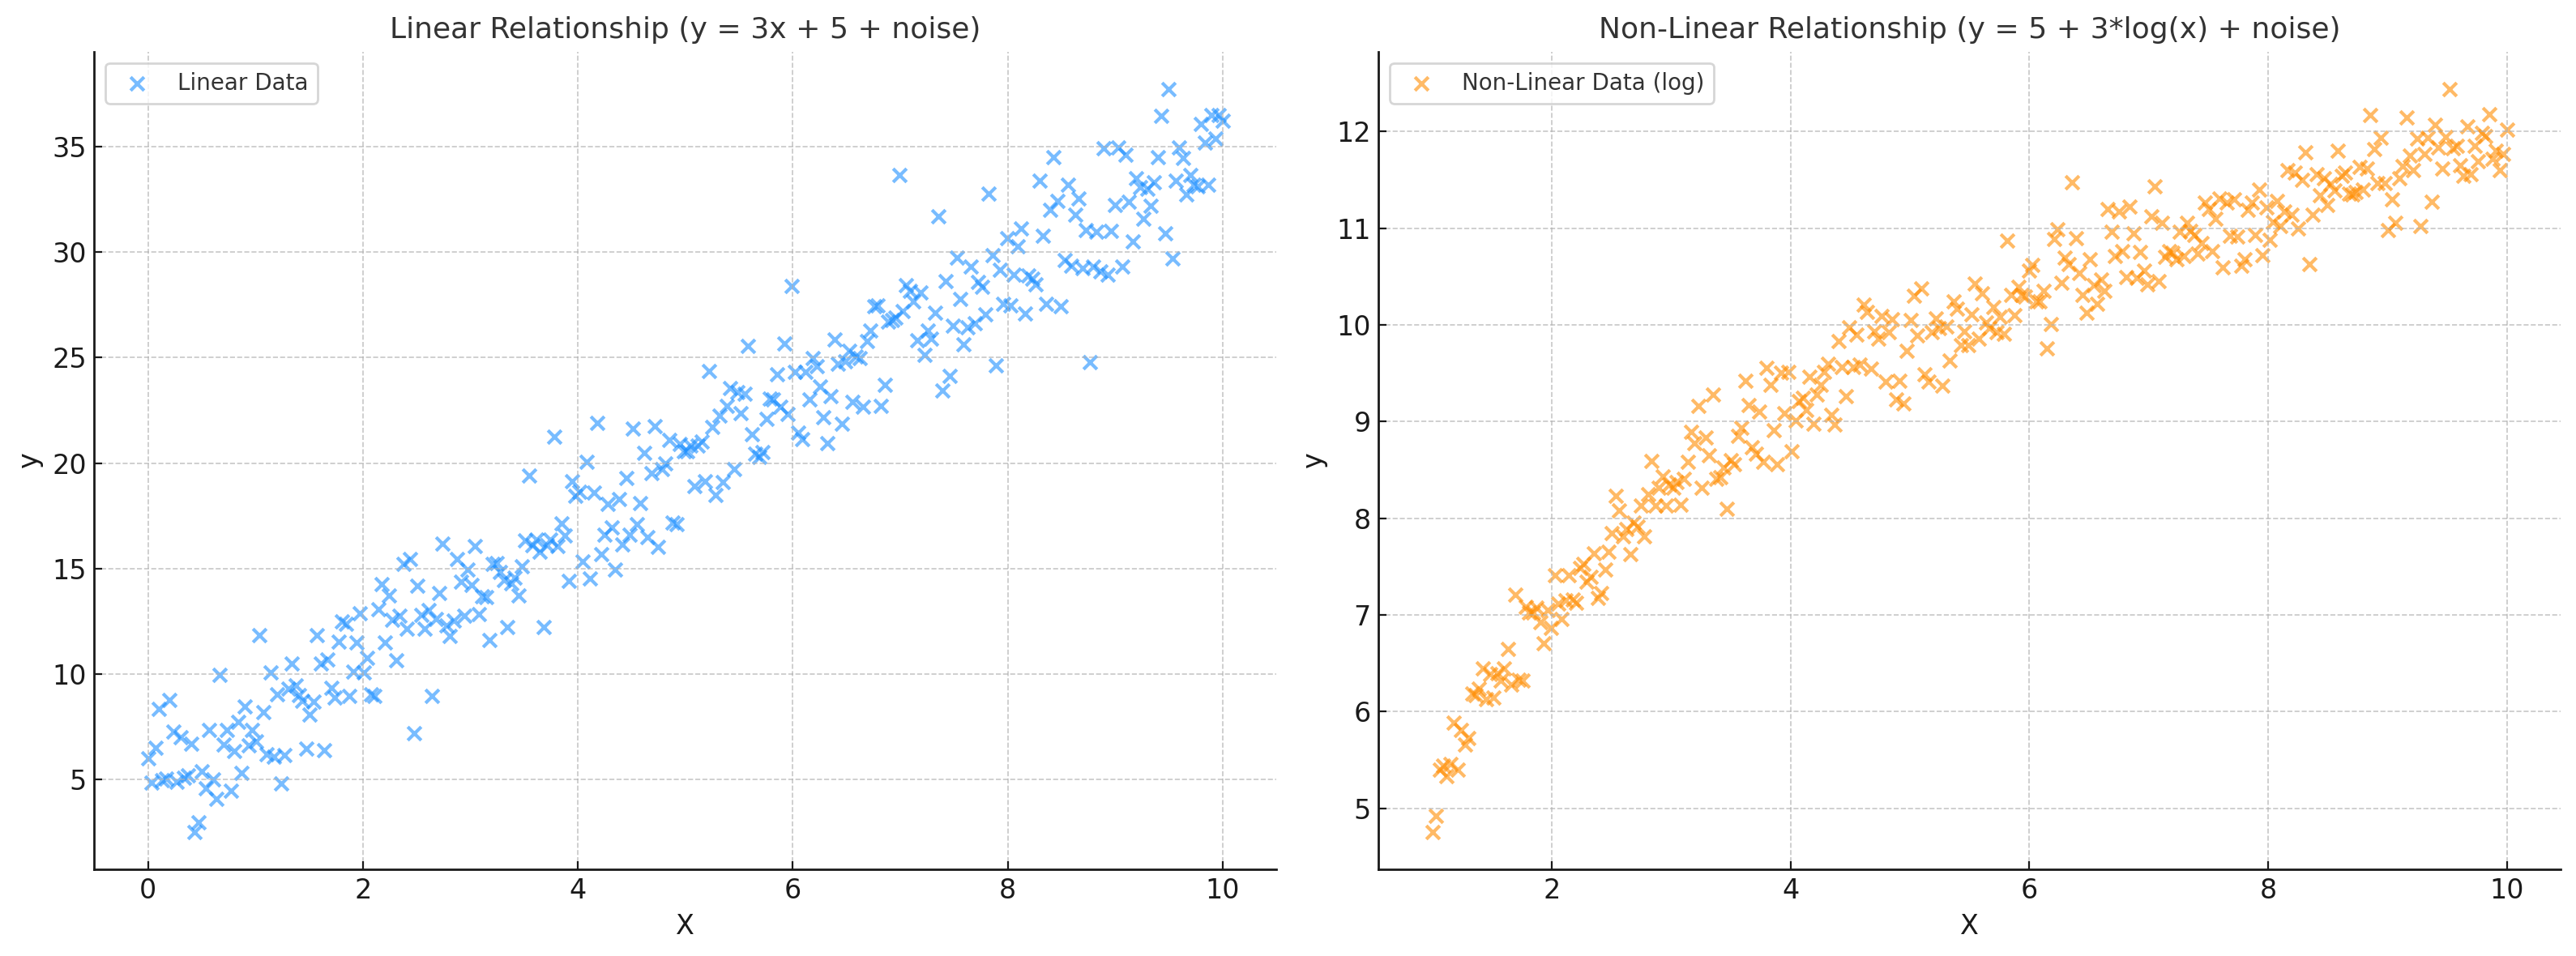

Here are **two clear visualizations** side-by-side:

---

### ✅ **Left Plot — Linear Relationship**

* **Equation**: `y = 3x + 5 + noise`
* The data points form a **straight-line trend** — as `x` increases, `y` increases at a constant rate.
* This type of relationship is ideal for **linear regression** because the underlying pattern is linear.

---

### ✅ **Right Plot — Non-Linear Relationship**

* **Equation**: `y = 5 + 3 * log(x) + noise`
* Here, `y` increases with `x`, but the **rate of increase slows down** — this is **logarithmic growth**.
* It’s a **non-linear trend**, meaning a straight line wouldn’t capture it accurately.
* This type of data needs a **non-linear transformation** (like log, square root, etc.) to be modeled properly.

---

### ✅ Key Differences Visually

| Aspect         | Linear Data             | Non-Linear Data (Log)              |
| -------------- | ----------------------- | ---------------------------------- |
| Trend          | Straight line           | Curve that flattens as X increases |
| Predictability | Constant slope          | Diminishing returns with X         |
| Fit            | Linear model works well | Needs transformation for good fit  |

Let me know if you want to apply linear regression on both and compare their residuals or R²!
